In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import math
import pprint
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [2]:
data = pd.read_csv('MSFT_sent_news.csv')

In [3]:
data['date']= data['publication_date']
#data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')
#data =data.set_index['date']
#data = date.drop(['publication_date'], axis=1)

In [4]:
data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')

In [5]:
data = data.set_index('date')

In [6]:
data = data.drop(['publication_date'], axis=1)

In [7]:
data[:100]

,compound,headline,neg,neu,pos,label
date,,,,,,
2016-04-22 01:05:08,0.0772,Intel and Microsoft face different challenges ...,0.000,0.874,0.126,0
2016-04-22 02:18:28,0.2500,"Microsoft revenue, profit misses estimates",0.244,0.385,0.372,1
2016-04-27 07:36:08,0.3612,Is India ready for the 'thinnest' laptop age?,0.000,0.737,0.263,1
2016-05-11 06:32:13,0.3612,"Are we ready for chatbots, the next technology...",0.000,0.762,0.238,1
2016-05-25 21:13:59,-0.5994,"Microsoft to cut 1,850 jobs at struggling smar...",0.412,0.588,0.000,-1
2016-05-30 07:50:04,0.0000,Microsoft seeks to empower every Indian: Satya...,0.000,1.000,0.000,0
2016-05-31 11:26:04,0.0000,Newgen Software's unique app now on Windows pl...,0.000,1.000,0.000,0
2016-06-13 10:12:03,0.0000,Microsoft launches its online store with Tata ...,0.000,1.000,0.000,0
2016-06-14 00:19:02,0.0000,Microsoft to buy LinkedIn for $26.2 billion in...,0.000,1.000,0.000,0


In [8]:
news_daily = data.resample('D').mean()

In [9]:
# Resample the full dataframe to monthly timeframe
#news_daily = data.resample('D').mean()



In [10]:
news_daily.fillna(0, inplace=True)
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-04-22,0.1636,0.122,0.6295,0.249,0.5
2016-04-23,0.0000,0.000,0.0000,0.000,0.0
2016-04-24,0.0000,0.000,0.0000,0.000,0.0
2016-04-25,0.0000,0.000,0.0000,0.000,0.0
2016-04-26,0.0000,0.000,0.0000,0.000,0.0


In [11]:
news_daily=news_daily.loc['2016-07-01':'2019-07-01']
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-07-01,0.0,0.0,0.0,0.0,0.0
2016-07-02,0.0,0.0,0.0,0.0,0.0
2016-07-03,0.0,0.0,0.0,0.0,0.0
2016-07-04,0.0,0.0,0.0,0.0,0.0
2016-07-05,0.0,0.0,0.0,0.0,0.0


In [12]:
news_daily.describe()

,compound,neg,neu,pos,label
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.079550,0.045314,0.779814,0.097318,0.187600
std,0.127200,0.046787,0.234509,0.060783,0.270739
min,-0.668600,0.000000,0.000000,0.000000,-1.000000
25%,0.009593,0.014643,0.803656,0.069717,0.000000
50%,0.079774,0.038062,0.844356,0.095830,0.188345
75%,0.142619,0.062661,0.878601,0.126721,0.333333
max,0.844200,0.417000,1.000000,0.558000,1.000000


### Fundamental Data

In [38]:
fund = pd.read_csv('MSFT_Fund.csv')
fund.head()

,date,marketcap,pricetobook,pricetoearnings,dividendyield,earningsyield,nopat,freecashflow,roe,ebitdagrowth,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
0,01/07/2019,1.050000e+12,10.2456,26.7185,0.016417,0.037427,3.422450e+10,2.158950e+10,0.401211,0.209991,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1005
1,28/06/2019,1.030000e+12,10.8992,29.6038,0.016627,0.033779,3.422450e+10,2.158950e+10,0.401211,0.209991,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059
2,27/06/2019,1.040000e+12,10.9147,29.6458,0.016604,0.033732,3.422450e+10,2.158950e+10,0.401211,0.209991,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059
3,26/06/2019,1.030000e+12,10.8968,29.5972,0.016631,0.033787,3.422450e+10,2.158950e+10,0.401211,0.209991,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059
4,25/06/2019,1.030000e+12,10.8561,29.4867,0.016693,0.033914,3.422450e+10,2.158950e+10,0.401211,0.209991,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059


In [39]:
fund['date']= pd.to_datetime(fund.date,format='%d/%m/%Y')

In [40]:

fund.index =fund['date']

In [41]:
#fund=fund.loc['2019-07-01':'2016-07-01']

In [42]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1111 entries, 2019-07-01 to NaT
Data columns (total 35 columns):
date                              776 non-null datetime64[ns]
marketcap                         776 non-null float64
pricetobook                       776 non-null float64
pricetoearnings                   776 non-null float64
dividendyield                     776 non-null float64
earningsyield                     776 non-null float64
nopat                             776 non-null float64
freecashflow                      776 non-null float64
roe                               776 non-null float64
ebitdagrowth                      776 non-null float64
ebitdamargin                      776 non-null float64
cashdividendspershare             776 non-null float64
bookvaluepershare                 776 non-null float64
capex                             776 non-null float64
currentratio                      776 non-null float64
debttoequity                      776 non-null flo

### Price analysis

In [43]:
df_price = pd.read_csv('MSFT_price.csv')

In [44]:
df_price['date']= df_price['date']
df_price['date']=pd.to_datetime(df_price.date,format='%Y-%m-%d')
df_price.index =df_price['date']

In [45]:
#df_price = df_price.drop(['date'], axis=1)

In [46]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-08-19,0,138.41,138.550000,136.885000,137.855000,24370543.0,138.41,2019-08-19,daily,138.55,False,136.885,137.855,24370543.0
2019-08-16,1,136.13,136.460000,134.720000,134.880000,25026151.0,136.13,2019-08-16,daily,136.46,False,134.720,134.880,25026151.0
2019-08-15,2,133.68,134.580000,132.250000,134.390000,28125416.0,133.68,2019-08-15,daily,134.58,False,132.250,134.390,28125416.0
2019-08-14,3,133.98,136.920000,133.670000,136.360000,32527251.0,133.98,2019-08-14,daily,136.92,False,133.670,136.360,32527251.0
2019-08-13,4,138.14,138.339336,134.551948,135.598463,25496593.0,138.60,2019-08-13,daily,138.80,False,135.000,136.050,25496593.0


In [47]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2019-08-19 to 2014-11-11
Data columns (total 14 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 132.4+ KB


In [48]:
df_price=df_price.loc['2019-07-01':'2016-07-01']

In [49]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-07-01,34,135.229691,136.246306,134.522048,136.176538,22654160.0,135.68,2019-07-01,daily,136.70,False,134.9700,136.63,22654160.0
2019-06-28,35,133.515400,134.153276,132.713869,134.123375,30042969.0,133.96,2019-06-28,daily,134.60,False,133.1558,134.57,30042969.0
2019-06-27,36,133.704769,134.262911,133.066893,133.694802,16557482.0,134.15,2019-06-27,daily,134.71,False,133.5100,134.14,16557482.0
2019-06-26,37,133.485499,135.289492,133.156595,133.904105,23657745.0,133.93,2019-06-26,daily,135.74,False,133.6000,134.35,23657745.0
2019-06-25,38,132.987159,137.133352,132.289482,136.794481,33327420.0,133.43,2019-06-25,daily,137.59,False,132.7300,137.25,33327420.0


In [50]:
#df.join(other, lsuffix='_caller', rsuffix='_other')
df_price = df_price.join(news_daily['compound'])
#full_df = pd.merge(df_price,news_daily['compound'],how='left')

In [51]:
df_price=pd.merge(df_price,fund,how='outer',on='date')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [52]:
df_price.index =df_price['date']

In [53]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,34.0,135.229691,136.246306,134.522048,136.176538,22654160.0,135.68,2019-07-01,daily,136.70,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1005
2019-06-28,35.0,133.515400,134.153276,132.713869,134.123375,30042969.0,133.96,2019-06-28,daily,134.60,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059
2019-06-27,36.0,133.704769,134.262911,133.066893,133.694802,16557482.0,134.15,2019-06-27,daily,134.71,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059
2019-06-26,37.0,133.485499,135.289492,133.156595,133.904105,23657745.0,133.93,2019-06-26,daily,135.74,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059
2019-06-25,38.0,132.987159,137.133352,132.289482,136.794481,33327420.0,133.43,2019-06-25,daily,137.59,...,5.304600e+10,2.630000e+11,1.680000e+11,7.310000e+10,3.492600e+10,4.749500e+10,-1.118600e+10,-3.424000e+10,2.403000e+09,1.1059


In [54]:
df_price['Unnamed: 0'].drop

<bound method Series.drop of date
2019-07-01    34.0
2019-06-28    35.0
2019-06-27    36.0
2019-06-26    37.0
2019-06-25    38.0
2019-06-24    39.0
2019-06-21    40.0
2019-06-20    41.0
2019-06-19    42.0
2019-06-18    43.0
2019-06-17    44.0
2019-06-14    45.0
2019-06-13    46.0
2019-06-12    47.0
2019-06-11    48.0
2019-06-10    49.0
2019-06-07    50.0
2019-06-06    51.0
2019-06-05    52.0
2019-06-04    53.0
2019-06-03    54.0
2019-05-31    55.0
2019-05-30    56.0
2019-05-29    57.0
2019-05-28    58.0
2019-05-24    59.0
2019-05-23    60.0
2019-05-22    61.0
2019-05-21    62.0
2019-05-20    63.0
              ... 
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            NaN
NaT            N

In [55]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1111 entries, 2019-07-01 to NaT
Data columns (total 49 columns):
Unnamed: 0                        754 non-null float64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              776 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null object
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
compound                          754 non-null float64
marketcap                         776 non-null float

In [56]:
df_price['ebitda'] = df_price['ebitda'].astype(float)

In [57]:
df_price.columns

Index(['Unnamed: 0', 'adj_close', 'adj_high', 'adj_low', 'adj_open',
       'adj_volume', 'close', 'date', 'frequency', 'high', 'intraperiod',
       'low', 'open', 'volume', 'compound', 'marketcap', 'pricetobook',
       'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat',
       'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta'],
      dtype='object')

In [58]:
fundamentals=['marketcap', 'pricetobook','pricetoearnings', 'dividendyield', 'earningsyield', 'nopat','freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
        'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments','one_yr_monthly_beta']

In [59]:
for column in fundamentals:
    df_price[column] = df_price[column].astype(float)

In [60]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1111 entries, 2019-07-01 to NaT
Data columns (total 49 columns):
Unnamed: 0                        754 non-null float64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              776 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null object
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
compound                          754 non-null float64
marketcap                         776 non-null float

### EDA

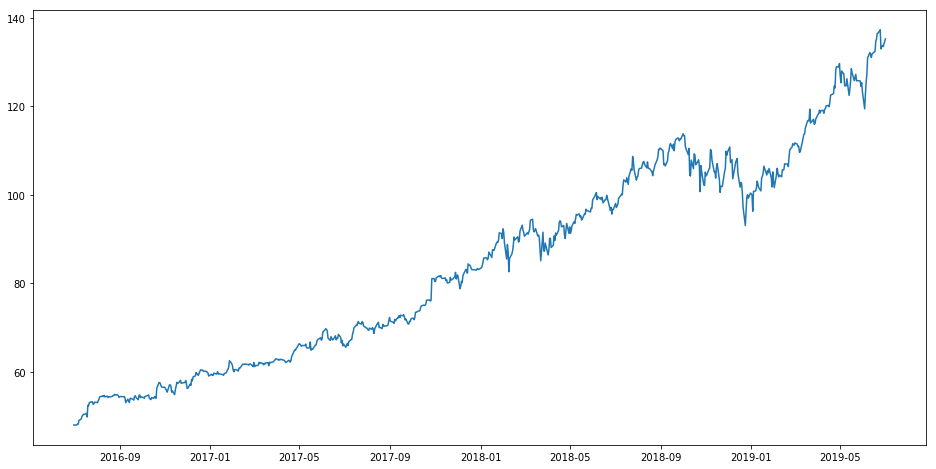

In [61]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_price['adj_close'], label='Close Price history')

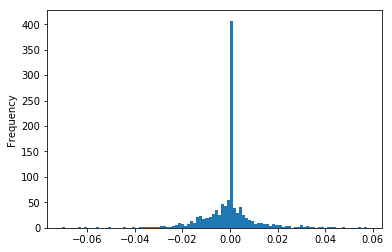

In [62]:
df_price['adj_close'].pct_change().plot.hist(bins=100)

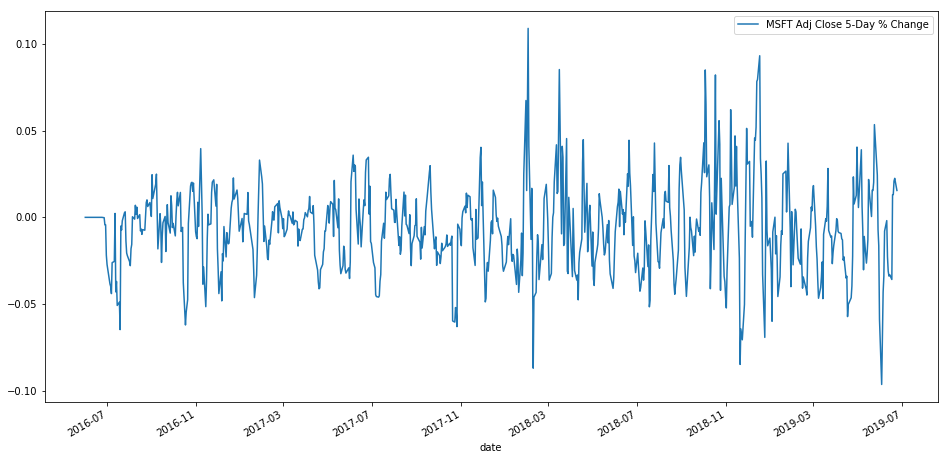

In [64]:
plt.figure(figsize=(16,8))
df_price['adj_close'].pct_change(5).plot(label='MSFT Adj Close 5-Day % Change',legend=True)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.172011
5d_close_future_pct     -0.172011             1.000000


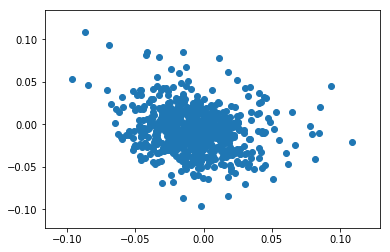

In [65]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_price['5d_future_close'] = df_price['adj_close'].shift(-5)
df_price['5d_close_future_pct'] = df_price['5d_future_close'].pct_change(5)
df_price['5d_close_pct'] = df_price['adj_close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(df_price['5d_close_pct'], df_price['5d_close_future_pct'])
plt.show()

                     compound  5d_close_future_pct
compound             1.000000            -0.064778
5d_close_future_pct -0.064778             1.000000


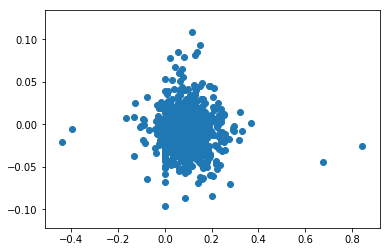

In [66]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['compound', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(df_price['compound'], df_price['5d_close_future_pct'])
plt.show()

In [67]:
import talib

In [68]:
MACD = talib.MACD(df_price['adj_close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
STOCH = talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

In [69]:
data = [MACD, STOCH]
df = pd.DataFrame(data)

In [70]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

#df_price['MACD'] = talib.MACD(df_price['adj_close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
    
#df_price['STOCH'] = talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = talib.SMA(df_price['adj_close'].values,
                              timeperiod=n) / df_price['adj_close']
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)
    
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

    

        

feature_names = feature_names + ['compound'] + fundamentals
print(feature_names)



['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare', 'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps', 'ebitda', 'totalassets', 'totalliabilities', 'debt', 'netincome', 'netcashfromoperatingactivities', 'netcashfrominvestingactivities', 'netcashfromfinancingactivities', 'longterminvestments', 'one_yr_monthly_beta']


In [71]:
df1 = df_price.copy()

In [72]:
#df1.join(df123['compound'],how='right')

In [73]:
# Drop all na values
df_price = df_price.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = df_price[feature_names]
targets = df_price['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = df_price[['5d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                                5d_close_future_pct  5d_close_pct      ma14  \
5d_close_future_pct                        1.000000     -0.217491  0.286688   
5d_close_pct                              -0.217491      1.000000 -0.833653   
ma14                                       0.286688     -0.833653  1.000000   
rsi14                                     -0.261375      0.652958 -0.816176   
ma30                                       0.344590     -0.652326  0.859910   
rsi30                                     -0.263696      0.495762 -0.632929   
ma50                                       0.330805     -0.562166  0.742090   
rsi50                                     -0.247095      0.371825 -0.467788   
ma200                                      0.244039     -0.274915  0.356916   
rsi200                                    -0.169533      0.181501 -0.208072   
compound                                  -0.071111     -0.052302  0.049351   
marketcap                                 -0.048617 

In [74]:
# Check for multicollinearity
columns = list(feat_targ_df.columns)
columns.remove('5d_close_future_pct')
number_of_columns_to_delete = 0

# We loop over all features
for i in range(len(columns)):
    column_i = columns[i]
    
   
    for j in range(i+1, len(columns)):
        column_j = columns[j]
        
        # Use .corr to detect correlation between the two features selected
        correlation = feat_targ_df[column_i].corr(feat_targ_df[column_j])
        
        # if correlation is higher than 0.9, a statement prints the correlation value
        if (column_i != column_j) and (correlation > 0.75):
            number_of_columns_to_delete = number_of_columns_to_delete + 1
            print(column_i +" is highly correlated with " + column_j + " with a correlation score of: {0:.4}".format(correlation))
            
if number_of_columns_to_delete == 0:
    print("No major correlation detected.")

ma14 is highly correlated with ma30 with a correlation score of: 0.8599
rsi14 is highly correlated with rsi30 with a correlation score of: 0.9023
ma30 is highly correlated with ma50 with a correlation score of: 0.9179
rsi30 is highly correlated with rsi50 with a correlation score of: 0.9395
rsi50 is highly correlated with rsi200 with a correlation score of: 0.8008
rsi200 is highly correlated with marketcap with a correlation score of: 0.9189
rsi200 is highly correlated with pricetobook with a correlation score of: 0.8452
rsi200 is highly correlated with pricetoearnings with a correlation score of: 0.8486
rsi200 is highly correlated with cashdividendspershare with a correlation score of: 0.849
rsi200 is highly correlated with finleverage with a correlation score of: 0.7512
rsi200 is highly correlated with ebitda with a correlation score of: 0.8119
rsi200 is highly correlated with netcashfromoperatingactivities with a correlation score of: 0.8395
rsi200 is highly correlated with netcashf

In [75]:
feature_names = ['5d_close_pct', 'ma14','ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield']






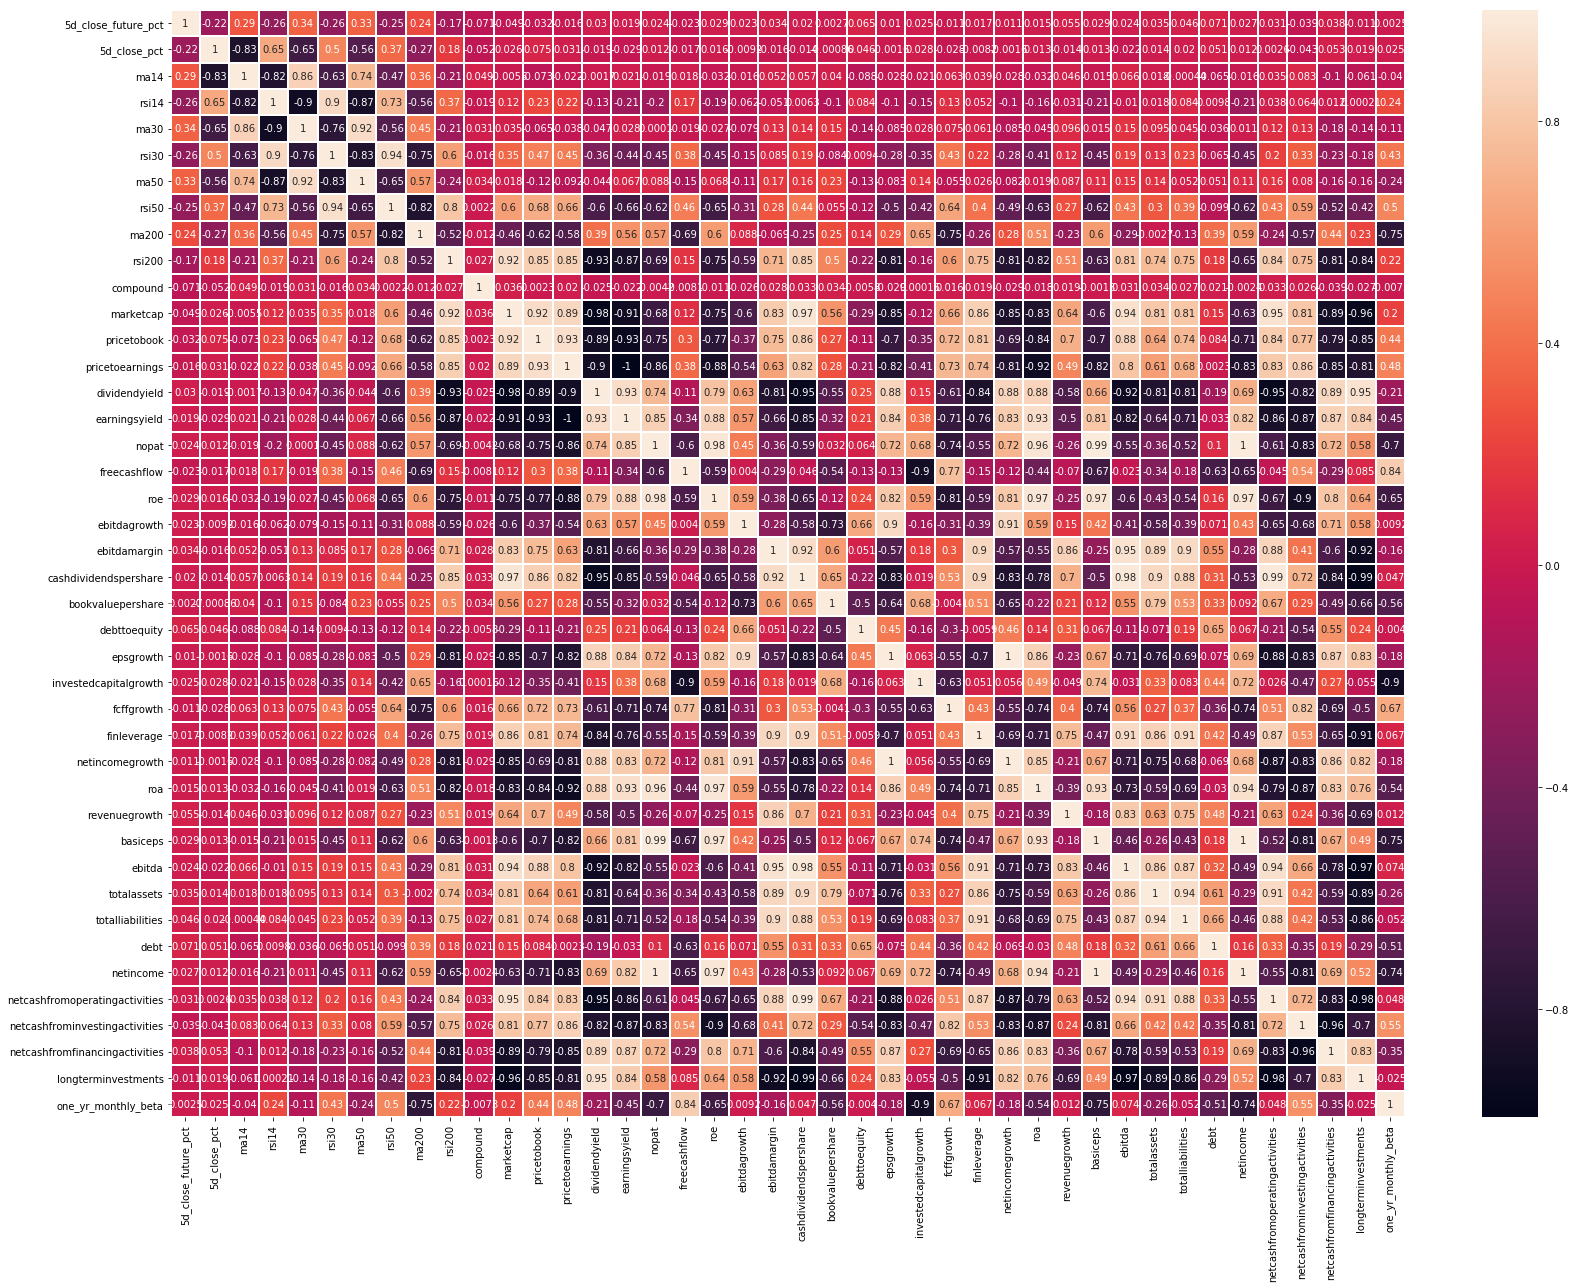

<Figure size 432x288 with 0 Axes>

In [76]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(24, 18))
sns.heatmap(corr, annot=True,linewidths=1)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
#plt.scatter(df_price['ma200'], df_price['5d_close_future_pct'])
#plt.show()

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=7):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
        variables = np.delete(variables, maxloc)
        dropped=True

    print('Remaining variables:')
    print(X.columns[variables])
    return X[cols[variables]]

In [83]:
calculate_vif_(train_features,thresh=7)

dropping 'freecashflow' at index: 17
Remaining variables:
Index(['const', '5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50',
       'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook',
       'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat', 'roe',
       'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare',
       'bookvaluepershare', 'debttoequity', 'epsgrowth',
       'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth',
       'roa', 'revenuegrowth', 'basiceps', 'ebitda', 'totalassets',
       'totalliabilities', 'debt', 'netincome',
       'netcashfromoperatingactivities', 'netcashfrominvestingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta'],
      dtype='object')


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,const,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2018-09-12,1.0,0.000090,1.016893,49.117473,1.000970,51.471738,0.982914,50.509710,1.030241,45.486554,...,4.673500e+10,2.590000e+11,1.760000e+11,7.624000e+10,1.657100e+10,4.388400e+10,-6.061000e+09,-3.359000e+10,1.862000e+09,1.4823
2018-09-11,1.0,-0.017401,1.018384,47.730159,1.006140,50.916156,0.988701,50.195404,1.033499,45.411049,...,4.673500e+10,2.590000e+11,1.760000e+11,7.624000e+10,1.657100e+10,4.388400e+10,-6.061000e+09,-3.359000e+10,1.862000e+09,1.4823
2018-09-10,1.0,-0.024612,1.032443,42.601924,1.023173,48.761420,1.006302,48.964986,1.049865,45.113204,...,4.673500e+10,2.590000e+11,1.760000e+11,7.624000e+10,1.657100e+10,4.388400e+10,-6.061000e+09,-3.359000e+10,1.862000e+09,1.4823
2018-09-07,1.0,-0.045515,1.039513,39.711579,1.034097,47.454609,1.017081,48.206511,1.059952,44.926916,...,4.673500e+10,2.590000e+11,1.760000e+11,7.624000e+10,1.657100e+10,4.388400e+10,-6.061000e+09,-3.359000e+10,1.862000e+09,1.4823
2018-09-06,1.0,-0.036932,1.031004,41.643048,1.029131,48.106334,1.012307,48.574722,1.053575,45.030256,...,4.673500e+10,2.590000e+11,1.760000e+11,7.624000e+10,1.657100e+10,4.388400e+10,-6.061000e+09,-3.359000e+10,1.862000e+09,1.4823
2018-09-05,1.0,-0.028825,1.029456,40.976189,1.030820,47.816934,1.015205,48.409074,1.054574,44.990235,...,4.673500e+10,2.590000e+11,1.760000e+11,7.624000e+10,1.657100e+10,4.388400e+10,-6.061000e+09,-3.359000e+10,1.862000e+09,1.4823
2018-09-04,1.0,0.004225,0.997890,51.703846,1.001319,51.689320,0.986796,50.622155,1.022970,45.615915,...,4.673500e+10,2.590000e+11,1.760000e+11,7.624000e+10,1.657100e+10,4.388400e+10,-6.061000e+09,-3.359000e+10,1.862000e+09,1.4823
2018-08-31,1.0,0.026970,0.991155,53.457904,0.997196,52.393006,0.982322,51.034843,1.016153,45.735353,...,4.673500e+10,2.590000e+11,1.760000e+11,7.624000e+10,1.657100e+10,4.388400e+10,-6.061000e+09,-3.359000e+10,1.862000e+09,1.4823
2018-08-30,1.0,0.034562,0.993486,52.206402,1.001289,51.913569,0.986081,50.769469,1.018467,45.673565,...,4.673500e+10,2.590000e+11,1.760000e+11,7.624000e+10,1.657100e+10,4.388400e+10,-6.061000e+09,-3.359000e+10,1.862000e+09,1.4823


In [84]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_features.values, i) for i in range(train_features.shape[1])]
vif["features"] = train_features.columns

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [85]:
vif.round(1)

,VIF Factor,features
0,0.000000e+00,const
1,3.700000e+00,5d_close_pct
2,1.080000e+01,ma14
3,1.192000e+02,rsi14
4,2.060000e+01,ma30
5,1.445400e+03,rsi30
6,3.300000e+01,ma50
7,1.719800e+03,rsi50
8,6.160000e+01,ma200
9,2.618000e+02,rsi200


In [86]:
# Import the statsmodels library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.80 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)
print(linear_features.shape, train_features.shape, test_features.shape)

(549, 42) (439, 42) (110, 42)
(549, 42) (439, 42) (110, 42)


In [87]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.371
Model:                             OLS   Adj. R-squared:                  0.346
Method:                  Least Squares   F-statistic:                     14.62
Date:                 Tue, 20 Aug 2019   Prob (F-statistic):           5.30e-33
Time:                         16:58:00   Log-Likelihood:                 1149.4
No. Observations:                  439   AIC:                            -2263.
Df Residuals:                      421   BIC:                            -2189.
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
co

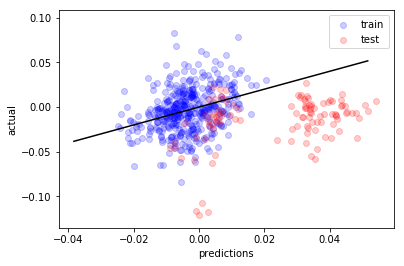

In [124]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha= 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

In [88]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# scikit-learn:
lr = LinearRegression()
lr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(train_features)
test_predictions = lr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()

In [89]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

0.37838150152789074
-4.6470385335479334e+17


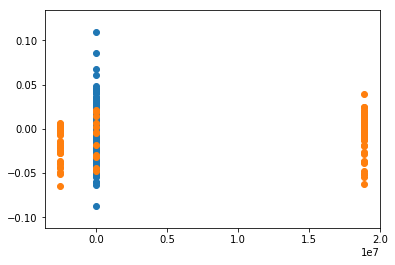

In [90]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)

(549, 42) (439, 42) (110, 42)
(549, 42) (439, 42) (110, 42)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [93]:
# scikit-learn:
lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()b

In [94]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

-1.5768508389699643e+24
-8.214230085063713e+23


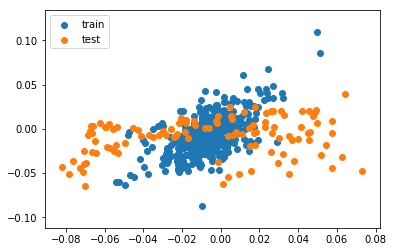

In [95]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Feature Engineering

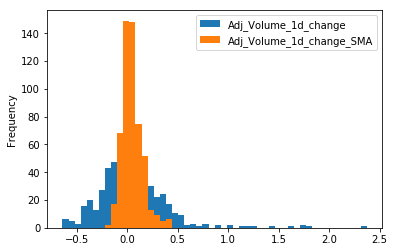

In [96]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA'] # +['MACD','STOCH']
feature_names.extend(new_features)
df_price['Adj_Volume_1d_change'] = df_price['adj_volume'].pct_change()
df_price['Adj_Volume_1d_change_SMA'] = talib.SMA(df_price['Adj_Volume_1d_change'].values,
                                               timeperiod=5)
#df_price['MACD'] = talib.MACD(df_price['adj_close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
#df_price['STOCH'] = talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)


# Plot histogram of volume % change data
df_price[new_features].plot(kind='hist', sharex=False, bins=50)
plt.show()

In [97]:
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(df_price.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)

# Set the index as the original DataFrame index for merging
days_of_week.index = df_price.index

# Join the dataframe with the days of week DataFrame
df_price = pd.concat([df_price, days_of_week], axis=1)

# Add days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
df_price.dropna(inplace=True)  # drop missing values in-place
print(df_price.head())

            Unnamed: 0   adj_close    adj_high     adj_low    adj_open  \
date                                                                     
2018-09-05       239.0  106.811586  109.696257  106.427620  109.292600   
2018-09-04       240.0  109.981771  110.222981  108.514822  109.135076   
2018-08-31       241.0  110.592179  111.032264  109.789788  109.957158   
2018-08-30       242.0  110.218058  110.867847  109.715948  109.942390   
2018-08-29       243.0  110.286975  110.296820  108.564049  108.741264   

            adj_volume   close       date frequency     high    ...      \
date                                                            ...       
2018-09-05  32872352.0  108.49 2018-09-05     daily  111.420    ...       
2018-09-04  22634641.0  111.71 2018-09-04     daily  111.955    ...       
2018-08-31  23222713.0  112.33 2018-08-31     daily  112.777    ...       
2018-08-30  22798702.0  111.95 2018-08-30     daily  112.610    ...       
2018-08-29  20818044.0  112.02 

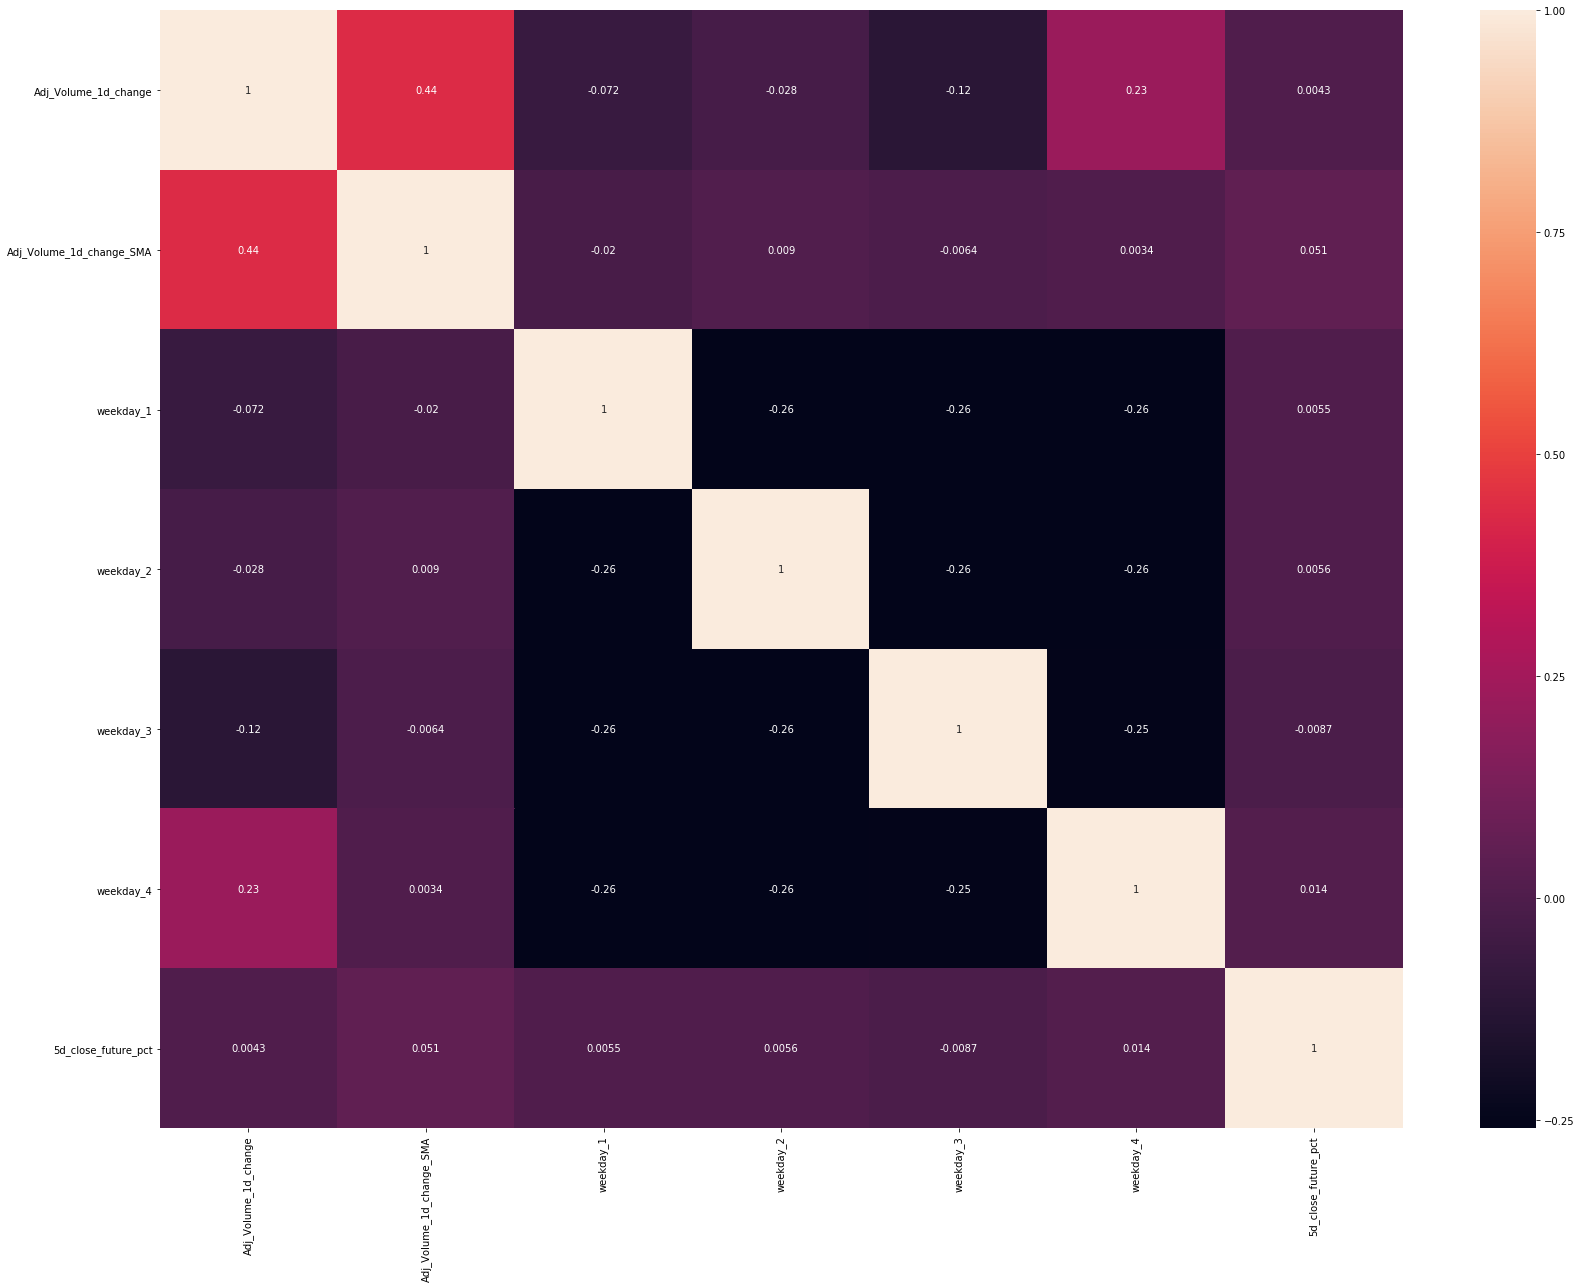

In [98]:
# Add the weekday labels to the new_features list
new_features.extend(['weekday_' + str(i) for i in range(1, 5)])
plt.figure(figsize=(24, 18))
# Plot the correlations between the new features and the targets
sns.heatmap(df_price[new_features + ['5d_close_future_pct']].corr(), annot=True)
plt.yticks(rotation=0)  # ensure y-axis ticklabels are horizontal
plt.xticks(rotation=90)  # ensure x-axis ticklabels are vertical
plt.tight_layout()
plt.show()

### Decision Tree

In [99]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.9999899042896567
-0.4886499831744977


In [100]:
#Scaled Data
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(scaled_train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(scaled_train_features, train_targets))
print(decision_tree.score(scaled_test_features, test_targets))

0.9999899042896567
-1.07552896216469


In [101]:
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.26669114392877524
-0.05094091163733516 

max_depth= 5
0.5263966557675843
-0.16449272116840685 

max_depth= 10
0.9245596775541155
-0.42403025351174084 



In [102]:
#Scaled Data
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(scaled_train_features, train_targets))
    print(decision_tree.score(scaled_test_features, test_targets), '\n')

max_depth= 3
-3.662416253657038
-4.088281183118316 

max_depth= 5
-4.053741232864291
-4.776088174860895 

max_depth= 10
-2.926593821223791
-4.1639021056780745 



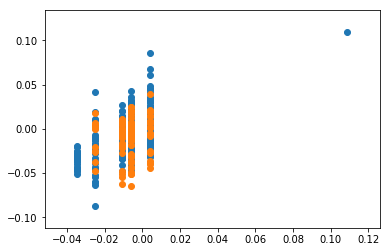

In [103]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

### Random Forest

In [104]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.9243624597048241
-0.08412226659870847


Usually, we can use sklearn's GridSearchCV() method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing. We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [105]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.011310042507171048 {'random_state': 42, 'n_estimators': 200, 'max_features': 8, 'max_depth': 3}


In [106]:
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.2922118177897086
0.006719691594787691


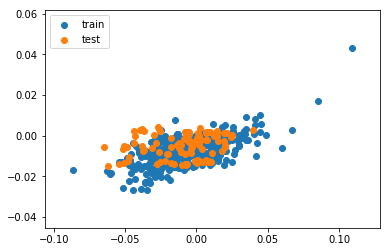

In [107]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

In [109]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
#x = range(features.shape)
# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical

plt.xticks(rotation=90)
plt.show()

IndexError: index 41 is out of bounds for axis 0 with size 17

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features,test_targets))

0.3729195132909531
-0.026330518021988162


In [111]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(feature_names)[sorted_index]

plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

IndexError: index 41 is out of bounds for axis 0 with size 17

### K Nearest Neighbour

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


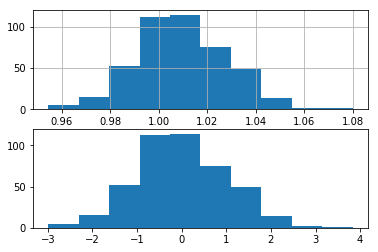

In [112]:


# Remove unimportant features (weekdays)
train_features = train_features.iloc[:, :-4]
test_features = test_features.iloc[:, :-4]

# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [113]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 20):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.779554241198734
-0.7591181827412052

n_neighbors = 3
train, test scores
0.6539948292601167
-0.49649769894053164

n_neighbors = 4
train, test scores
0.5692568763613061
-0.36199608337840283

n_neighbors = 5
train, test scores
0.49811541579409646
-0.18881998546981515

n_neighbors = 6
train, test scores
0.4466971720885182
-0.16923333162220722

n_neighbors = 7
train, test scores
0.42610707258408376
-0.15809582161246172

n_neighbors = 8
train, test scores
0.39993425110594916
-0.11825324364137191

n_neighbors = 9
train, test scores
0.3785690051454341
-0.08684075366604982

n_neighbors = 10
train, test scores
0.33821416258179837
-0.06282269178807831

n_neighbors = 11
train, test scores
0.32129827508305686
-0.04769155548736359

n_neighbors = 12
train, test scores
0.3209217878591618
-0.04245283592143223

n_neighbors = 13
train, test scores
0.3006458276461734
-0.02327784410735867

n_neighbors = 14
train, test scores
0.28607744874691865
-0.043874888338797824

n_

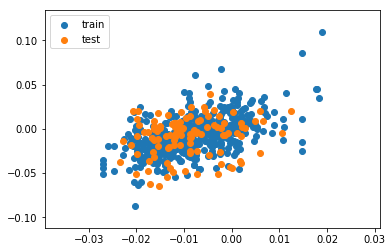

In [114]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=17)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Neural Network 

In [115]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/25
439/439 [==============================] - 0s 483us/step - loss: 0.0958
Epoch 2/25
439/439 [==============================] - 0s 22us/step - loss: 0.0129
Epoch 3/25
439/439 [==============================] - 0s 22us/step - loss: 0.0053
Epoch 4/25
439/439 [==============================] - 0s 21us/step - loss: 0.0032
Epoch 5/25
439/439 [==============================] - 0s 22us/step - loss: 0.0020
Epoch 6/25
439/439 [==============================] - 0s 22us/step - loss: 0.0017
Epoch 7/25
439/439 [==============================] - 0s 21us/step - loss: 0.0017
Epoch 8/25
439/439 [==============================] - 0s 29us/step - loss: 0.0014
Epoch 9/25
439/439 [==============================] - 0s 35us/step - loss: 0.0010
Epoch 10/25
439/439 [==============================] - 0s 25us/step - loss: 8.9976e-04
Epoch 11/25
439/439 [==============================] - 0s 22us/step - loss: 8.2135e-04
Epoch 12/25
439/439 [==============================] - 0s 28us/step - loss: 7.4865e-04


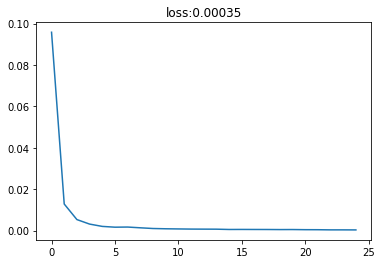

In [116]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

0.36089072999132854
-228.63874110025102


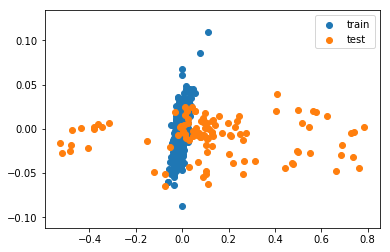

In [117]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds,test_targets, label='test')
plt.legend()
plt.show()

In [118]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x1c3d523840>


Epoch 1/25
439/439 [==============================] - 0s 418us/step - loss: 5.2583
Epoch 2/25
439/439 [==============================] - 0s 24us/step - loss: 1.4495
Epoch 3/25
439/439 [==============================] - 0s 22us/step - loss: 0.4815
Epoch 4/25
439/439 [==============================] - 0s 28us/step - loss: 0.2846
Epoch 5/25
439/439 [==============================] - 0s 24us/step - loss: 0.1976
Epoch 6/25
439/439 [==============================] - 0s 23us/step - loss: 0.1515
Epoch 7/25
439/439 [==============================] - 0s 30us/step - loss: 0.1149
Epoch 8/25
439/439 [==============================] - 0s 24us/step - loss: 0.1010
Epoch 9/25
439/439 [==============================] - 0s 25us/step - loss: 0.0892
Epoch 10/25
439/439 [==============================] - 0s 30us/step - loss: 0.0722
Epoch 11/25
439/439 [==============================] - 0s 22us/step - loss: 0.0692
Epoch 12/25
439/439 [==============================] - 0s 27us/step - loss: 0.0578
Epoch 13/25


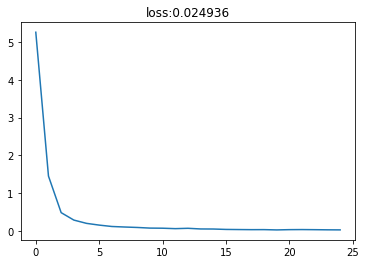

In [119]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

-3.677452125569398
-337.2304924572495


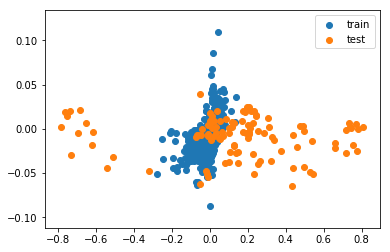

In [120]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label= 'test')  # plot test set
plt.legend(); plt.show()

Epoch 1/25
439/439 [==============================] - 0s 475us/step - loss: 0.0999
Epoch 2/25
439/439 [==============================] - 0s 26us/step - loss: 0.0454
Epoch 3/25
439/439 [==============================] - 0s 24us/step - loss: 0.0246
Epoch 4/25
439/439 [==============================] - 0s 32us/step - loss: 0.0192
Epoch 5/25
439/439 [==============================] - 0s 33us/step - loss: 0.0157
Epoch 6/25
439/439 [==============================] - 0s 25us/step - loss: 0.0122
Epoch 7/25
439/439 [==============================] - 0s 23us/step - loss: 0.0108
Epoch 8/25
439/439 [==============================] - 0s 23us/step - loss: 0.0081
Epoch 9/25
439/439 [==============================] - 0s 30us/step - loss: 0.0065
Epoch 10/25
439/439 [==============================] - 0s 26us/step - loss: 0.0064
Epoch 11/25
439/439 [==============================] - 0s 24us/step - loss: 0.0058
Epoch 12/25
439/439 [==============================] - 0s 31us/step - loss: 0.0048
Epoch 13/25


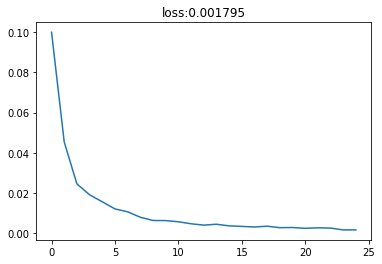

In [121]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [122]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1,test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[0.25294346 0.3077512  0.28388605 0.2259867  0.27822375]


-0.04764044124717115
-37.70419667637577


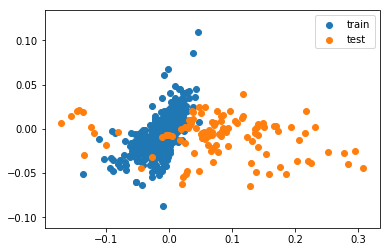

In [123]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()